# Car Insurance Cross Selling Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn import over_sampling,under_sampling
from sklearn.ensemble import RandomForestClassifier

## Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# Data Logic and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
category=['Gender','Vehicle_Age','Vehicle_Damage']
numeric=['id','Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']

In [5]:
df[category].value_counts()

Gender  Vehicle_Age  Vehicle_Damage
Male    1-2 Year     Yes               79533
Female  < 1 Year     No                66047
Male    < 1 Year     No                50543
Female  1-2 Year     Yes               48692
Male    1-2 Year     No                42791
Female  1-2 Year     No                29300
        < 1 Year     Yes               25274
Male    < 1 Year     Yes               22922
        > 2 Years    Yes               10293
Female  > 2 Years    Yes                5699
                     No                    8
Male    > 2 Years    No                    7
Name: count, dtype: int64

In [6]:
df[category].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [7]:
df[numeric].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
## Missing Value
df.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [9]:
## Duplicated Data
df.duplicated().any()

False

## EDA Summary

- The data is logic
- The data type is okay. although it is better to change it into numeric for better machine learning
- No missing value
- No duplicated data

## Category Preprocessing

In [10]:
# Category Data
df[category].head()
##### List all of the columns
##### One hot encoding?
##### Change data to label?
##### Any imbalance value?

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


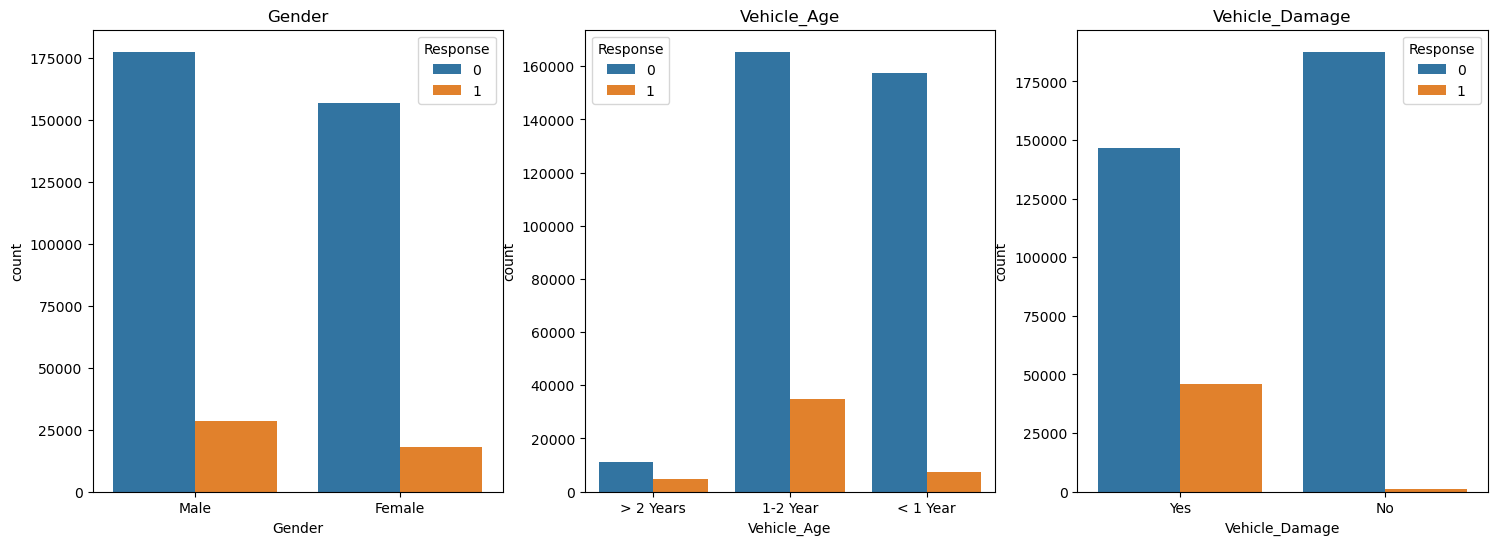

In [11]:
#data imbalance
features=['Gender','Vehicle_Age','Vehicle_Damage']
titles=['Gender','Vehicle_Age','Vehicle_Damage']
fig,axes=plt.subplots(1,3,figsize=(18,6))

for i, feature in enumerate(features):
    sns.countplot(x=df[feature], ax=axes[i],hue=df['Response'])
    axes[i].set_title(titles[i])

plt.tight_layout;

In [12]:
# One Hot Encoding for Gender
gender_label=pd.get_dummies(df['Gender'],prefix='Gender').astype(int)
gender_label.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [13]:
# Change data lable for Vehicle_Age
vehicle_age_label=[]

for index, column in df.iterrows():
    if column['Vehicle_Age']=='> 2 Years':
        y=2
    elif column['Vehicle_Age']=='1-2 Year':
        y=1
    else:
        y=0
    vehicle_age_label.append(y)

In [14]:
df['vehicle_age_label']=vehicle_age_label
df[['Vehicle_Age','vehicle_age_label']].sample(10)

,Vehicle_Age,vehicle_age_label
133370,1-2 Year,1
29179,1-2 Year,1
256474,< 1 Year,0
142167,1-2 Year,1
180570,< 1 Year,0
29010,1-2 Year,1
139849,< 1 Year,0
206967,1-2 Year,1
125805,1-2 Year,1
25122,1-2 Year,1


In [15]:
# One hot encoding
damage_label=pd.get_dummies(df['Vehicle_Damage'],prefix='Vehicle_Damage').astype(int)
damage_label.head()

,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [16]:
# Final table
df2=df.join(gender_label)
df3=df2.join(damage_label)
df3.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_label,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,0,1,0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,1,1,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,0,1,0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,1,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,1,0,1,0


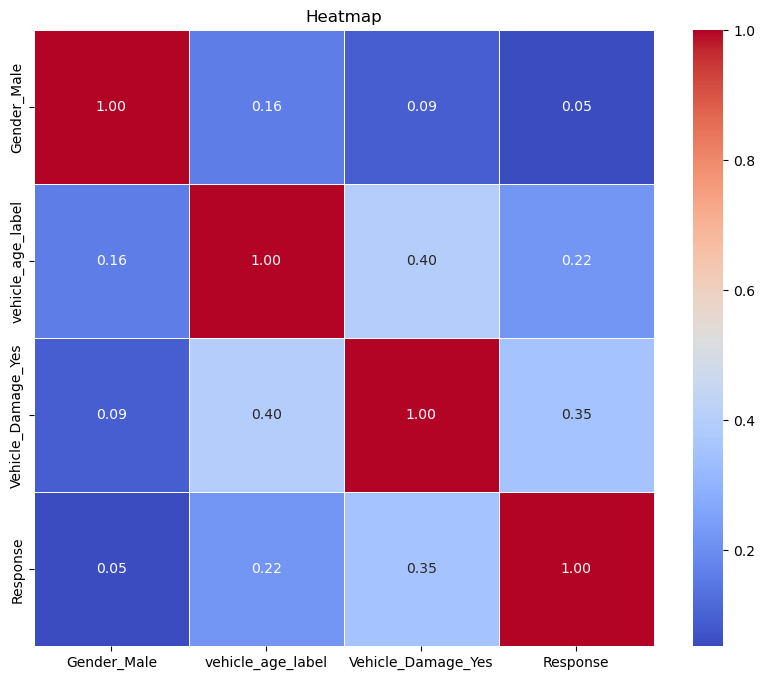

In [17]:
correlation_matrix=df3[['Gender_Male','vehicle_age_label','Vehicle_Damage_Yes','Response']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Heatmap')
plt.show()

## Category Summary

- Gender: Changed to number using one hot encoding (low correlation)
- vehicle age: Changed to lable (high correlation)
- vehicle damage: Changed to number using one hot encoding (high correlation)
- Final dataframe is df3

## Numeric Preprocessing

In [18]:
## Numerical Data Data
df3[numeric].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


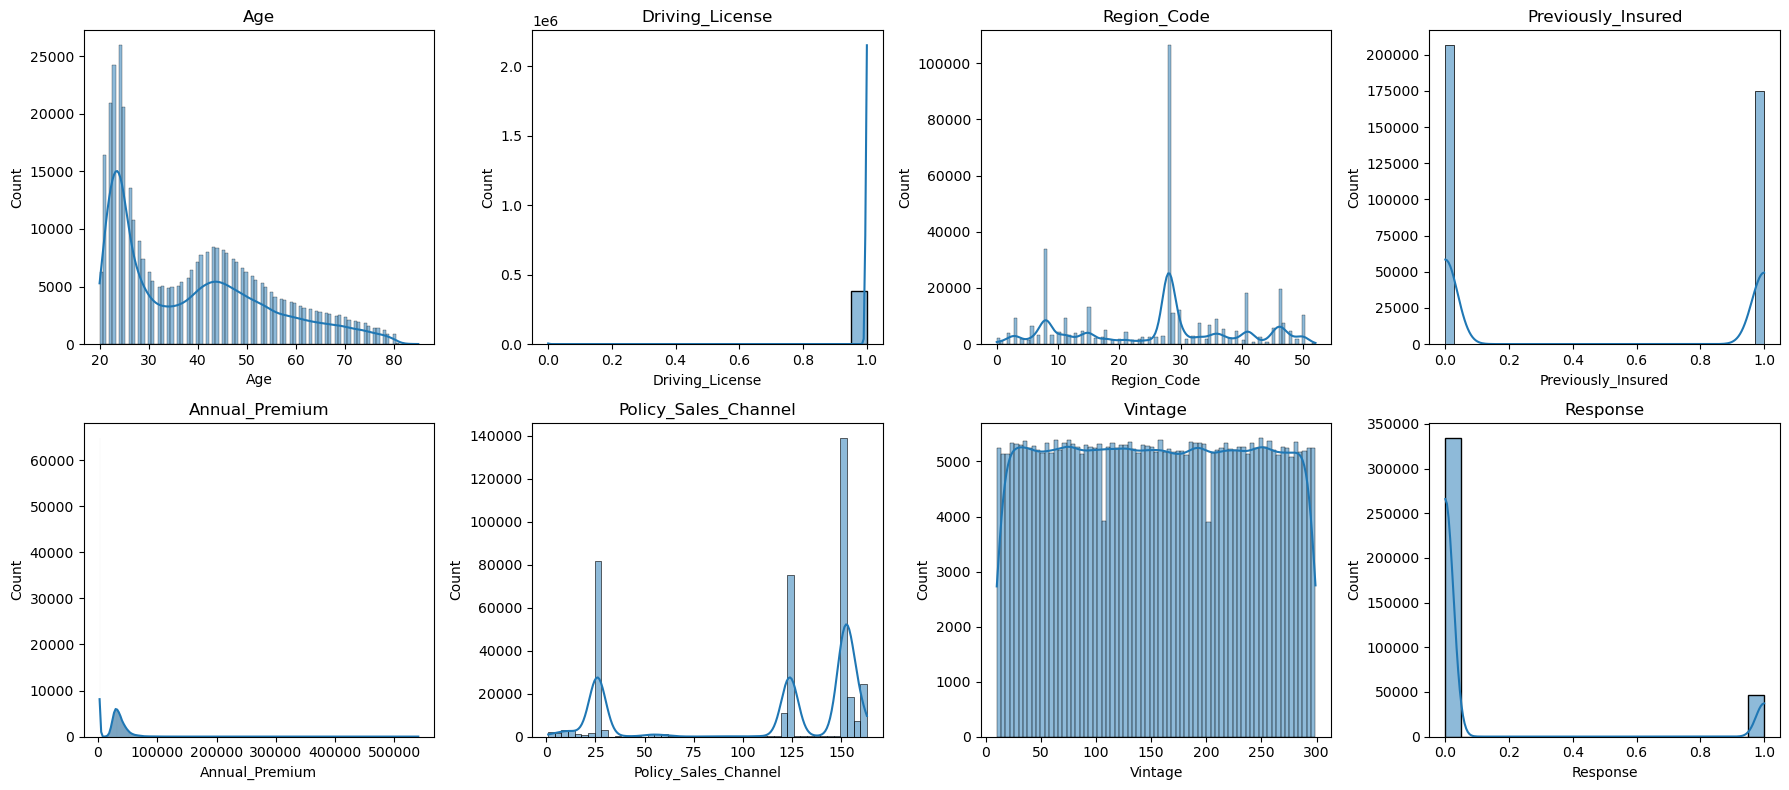

In [19]:
#data distribution
features= ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
titles=   ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']

fig, axes = plt.subplots(2, 4, figsize=(18, 8), squeeze=False)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df3[feature], ax=axes[i], kde=True)
    axes[i].set_title(titles[i])

plt.tight_layout()

In [20]:
# Divide the response
yes=df3[df3['Response']==1]
no=df3[df3['Response']==0]

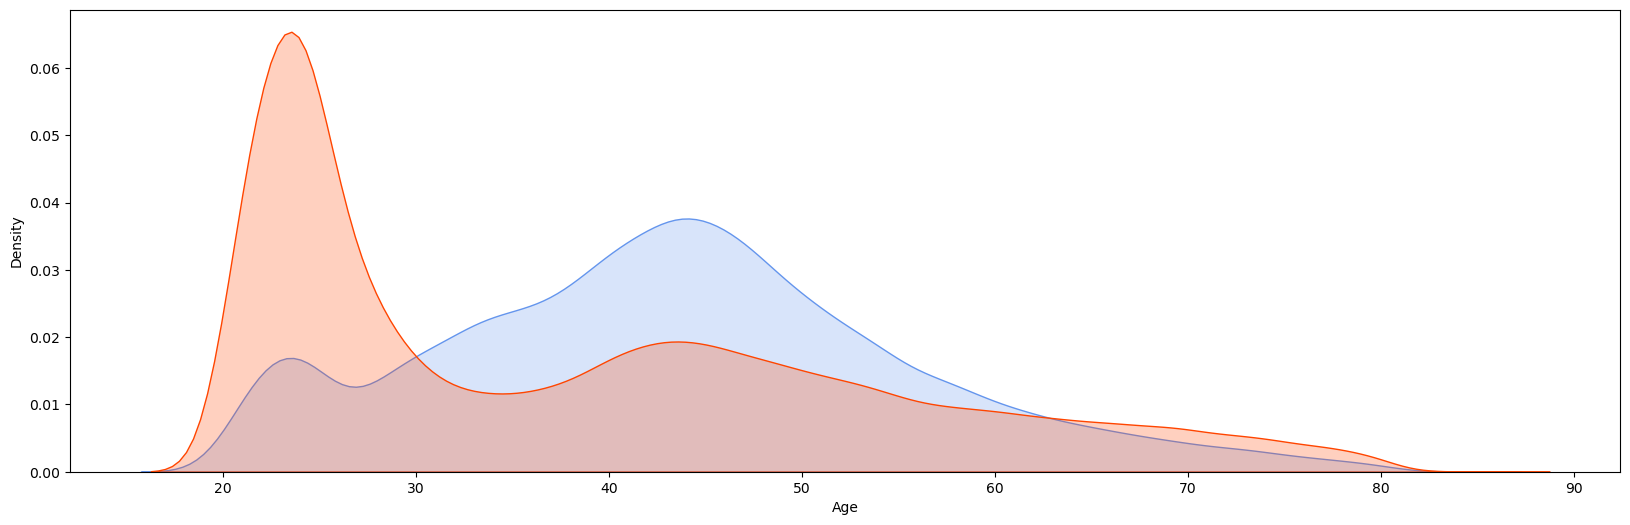

In [21]:
# Handling Age
plt.figure(figsize=(20,6))
sns.kdeplot(yes['Age'],color='cornflowerblue',fill=True)
sns.kdeplot(no['Age'],color='orangered',fill=True);

In [22]:
# From the graph, it can be seen that age can be binned into three categories, 20-30 is the one with mostly say no, 30,50 is the who said yes, and the rest is someone who said yes and no (combined)
age_binned=[]

for index, column in df3.iterrows():
    if column['Age']<=30:
        y=0
    elif (column['Age']>=30) & (column['Age']<=50):
        y=1
    else:
        y=2
    age_binned.append(y)

df3['age_binned']=age_binned
df3[['Age','age_binned']].head()

,Age,age_binned
0,44,1
1,76,2
2,47,1
3,21,0
4,29,0


<Axes: xlabel='age_binned', ylabel='count'>

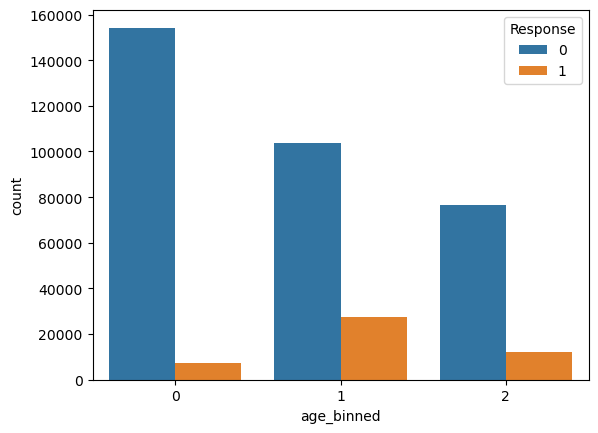

In [23]:
# The age is balanced now
sns.countplot(x='age_binned',data=df3,hue=df3['Response'])

<Axes: xlabel='Driving_License', ylabel='count'>

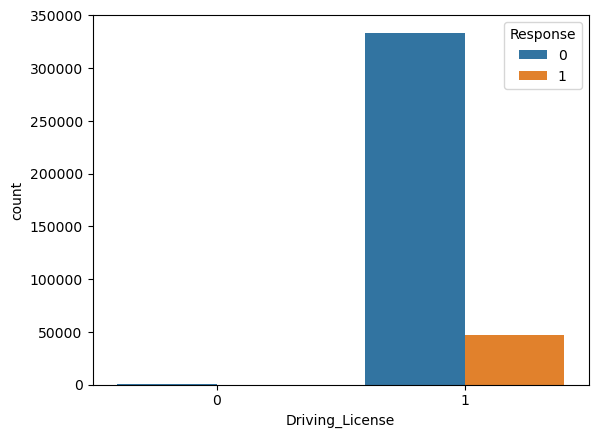

In [24]:
# handling driving license
sns.countplot(x='Driving_License',data=df3,hue=df['Response'])

# Logically, it is not necessary as of course the sales will offer the insurance to license holder only, it is better to drop it

<Axes: xlabel='Region_Code', ylabel='count'>

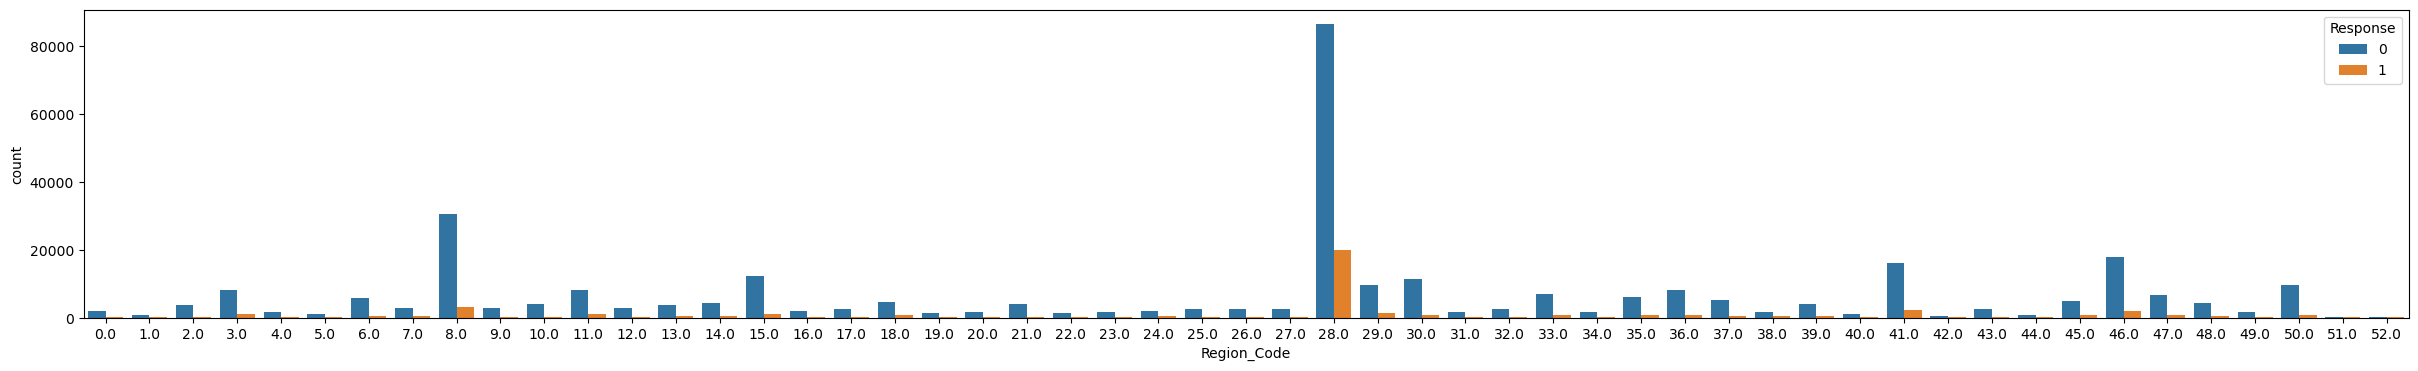

In [25]:
# handling Region Code
plt.figure(figsize=(30,4))
sns.countplot(x='Region_Code',data=df3,hue=df['Response'])

# might as well drop it since the correlation is low

<Axes: xlabel='Previously_Insured', ylabel='count'>

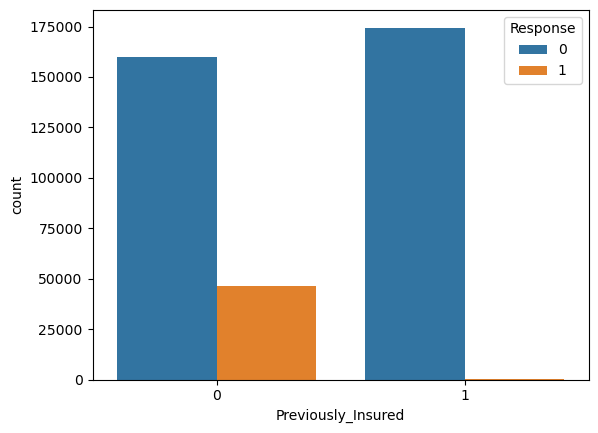

In [26]:
# handling previously insured
sns.countplot(x='Previously_Insured',data=df3,hue=df['Response'])

# no need to change and kind of make sense as someone who previously has not insured will accept the offer

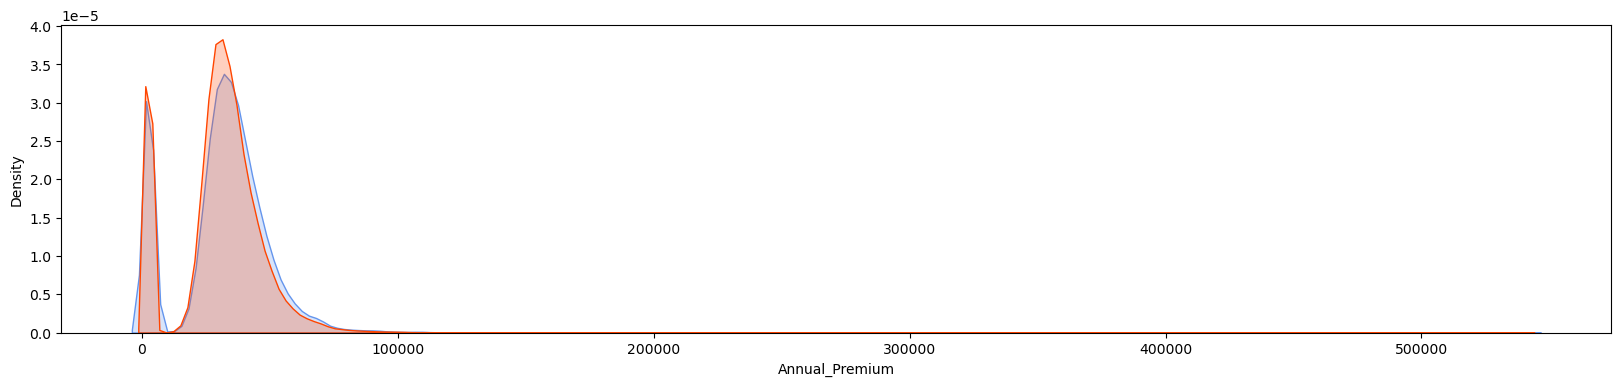

In [27]:
# handling annual premium
plt.figure(figsize=(20,4))
sns.kdeplot(x=yes['Annual_Premium'],color='cornflowerblue',fill=True)
sns.kdeplot(x=no['Annual_Premium'],color='orangered',fill=True);

# Need to log transform it

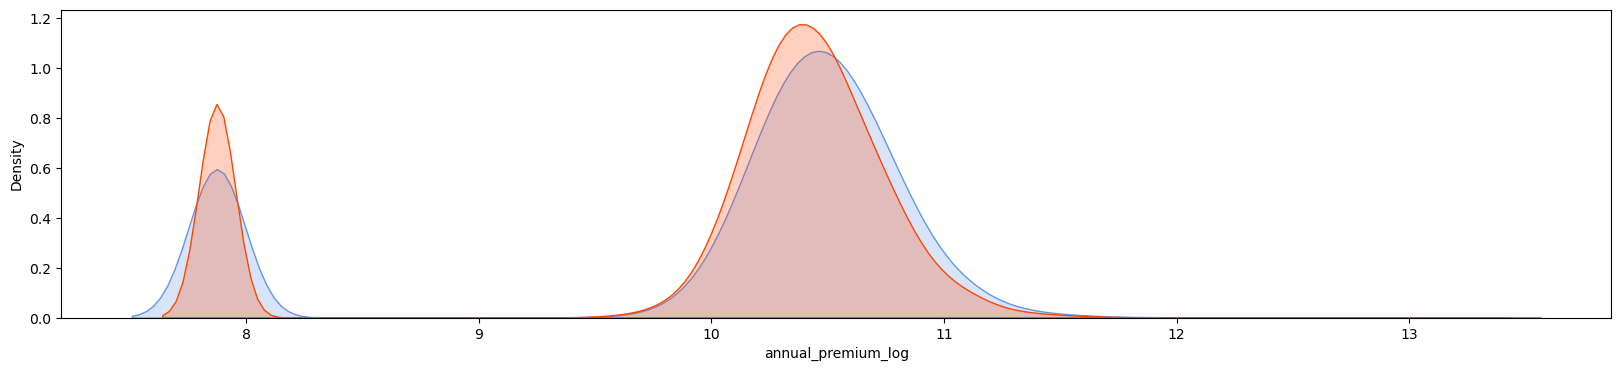

In [28]:
df3['annual_premium_log']=np.log1p(df3['Annual_Premium'])
yes=df3[df3['Response']==1]
no=df3[df3['Response']==0]
plt.figure(figsize=(20,4))
sns.kdeplot(x=yes['annual_premium_log'],color='cornflowerblue',fill=True)
sns.kdeplot(x=no['annual_premium_log'],color='orangered',fill=True);

# Still find a bad distribution, might as well try to give a lable

In [29]:
annual_binned=[]

for index, column in df3.iterrows():
    if column['annual_premium_log']<=9.5:
        y=0
    else:
        y=1
    annual_binned.append(y)
df3['annual_binned']=annual_binned

<Axes: xlabel='annual_binned', ylabel='count'>

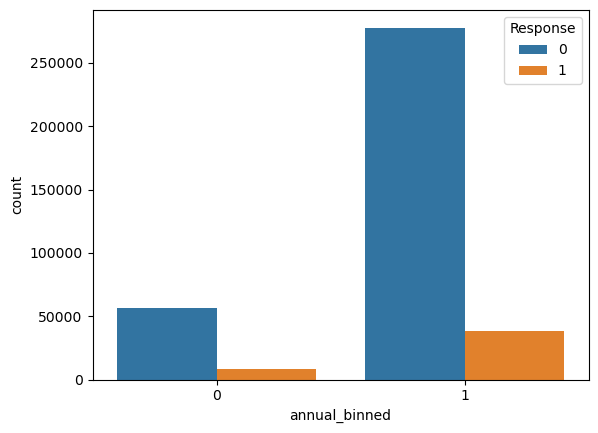

In [30]:
sns.countplot(x='annual_binned',data=df3,hue=df3['Response'])

# the final label is divided by two 0 and 1

<Axes: xlabel='count', ylabel='Policy_Sales_Channel'>

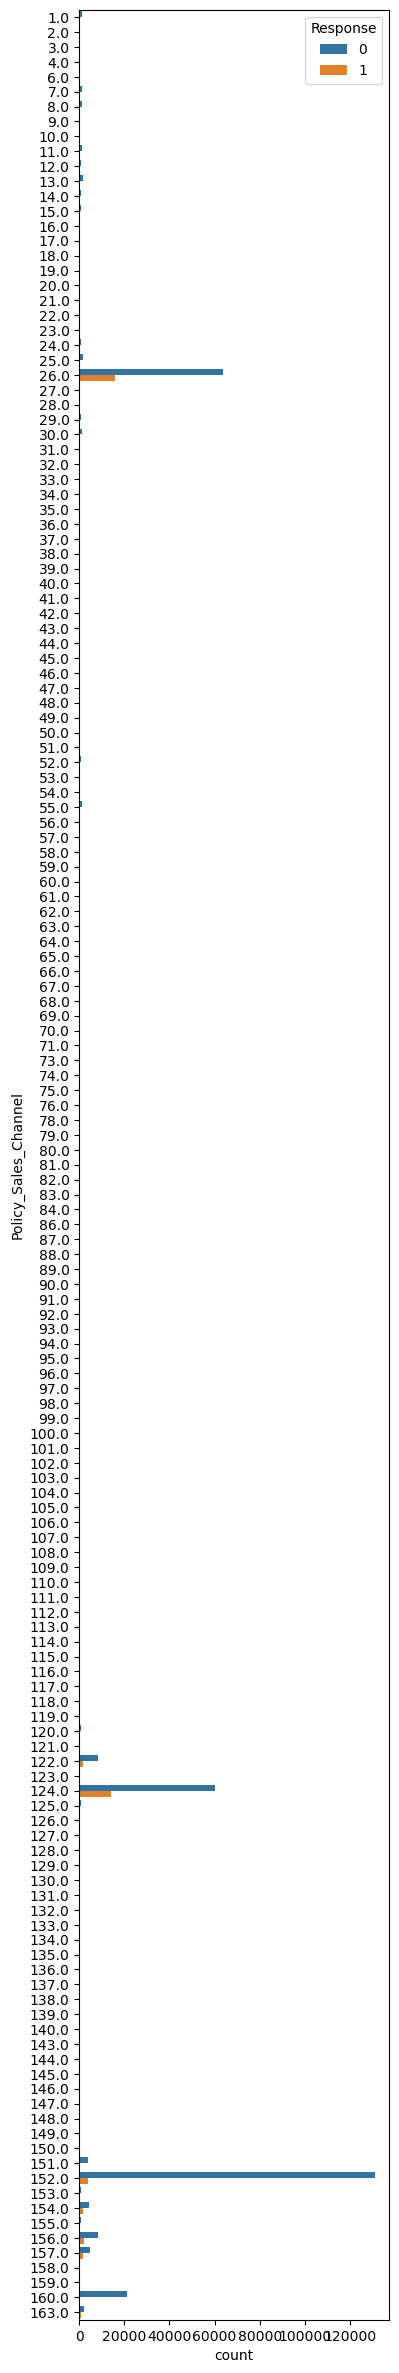

In [31]:
# handling policy sales channel
plt.figure(figsize=(4,30))
sns.countplot(y='Policy_Sales_Channel',data=df3,hue=df3['Response'])

# seems like some channel has a good correlation with the response, will try to classify it

<Axes: xlabel='channel_binned', ylabel='count'>

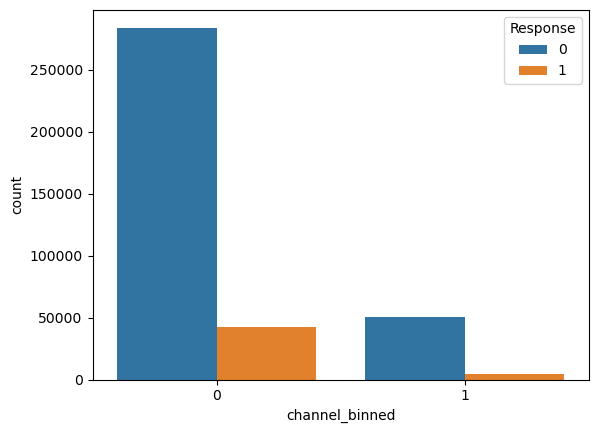

In [32]:
selected_channel=[152,154,156,157,163,122,124,25,26]
channel_binned=[]
for index, column in df3.iterrows():
    if column['Policy_Sales_Channel'] in selected_channel:
        y=0
    else:
        y=1
    channel_binned.append(y)

df3['channel_binned']=channel_binned
sns.countplot(x='channel_binned',data=df3,hue=df3['Response'])    

<Axes: xlabel='Vintage', ylabel='Density'>

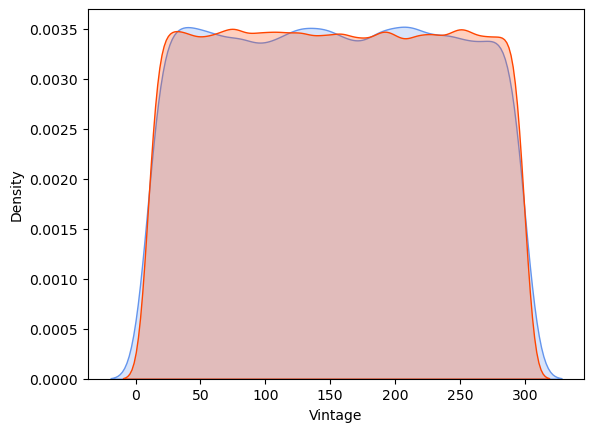

In [33]:
# Handling vintage
yes=df3[df3['Response']==1]
no=df3[df3['Response']==0]
sns.kdeplot(yes['Vintage'].astype(float),color='cornflowerblue',fill=True)
sns.kdeplot(no['Vintage'].astype(float),color='orangered',fill=True)

# just leave it as it is as it has low correlation

<Axes: xlabel='Response', ylabel='count'>

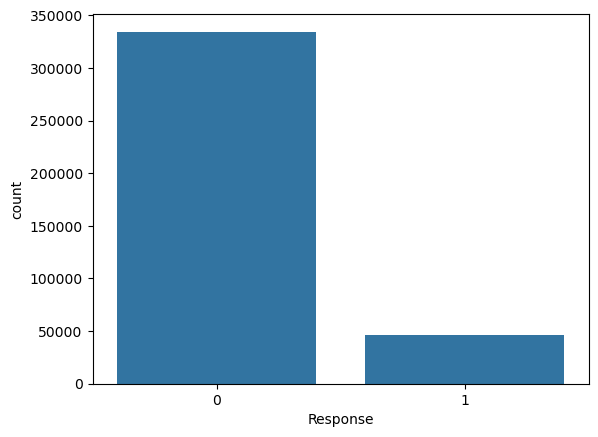

In [34]:
# Handling Response
sns.countplot(x='Response',data=df3)
# Need to oversampling

In [35]:
x=df3.drop('Response',axis=1)
y=df3['Response']
print(x.shape)
print(y.shape)

(381109, 20)
(381109,)


In [36]:
x_over,y_over=over_sampling.RandomOverSampler().fit_resample(x,y)
df4=x_over
df4['response']=y_over
print(df4['response'].value_counts())
df4.head()

response
1    334399
0    334399
Name: count, dtype: int64


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,vehicle_age_label,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,age_binned,annual_premium_log,annual_binned,channel_binned,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,...,2,0,1,0,1,1,10.607946,1,0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,...,1,0,1,1,0,2,10.420405,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,...,2,0,1,0,1,1,10.553075,1,0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,...,0,0,1,1,0,0,10.261861,1,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,...,0,1,0,1,0,0,10.221832,1,0,0


## Numeric Summary

- Age: Classify based on response (medium correlation)
- Driving License: No action (low correlation)
- Region Code: No action (low correlation)
- Previously Insured: No action (high correlation)
- Annual premium: log transformation and classification (low correlation)
- Policy sales channel: classify based on response (medium correlation)
- Vintage: No action (low correlation)

## Final Data

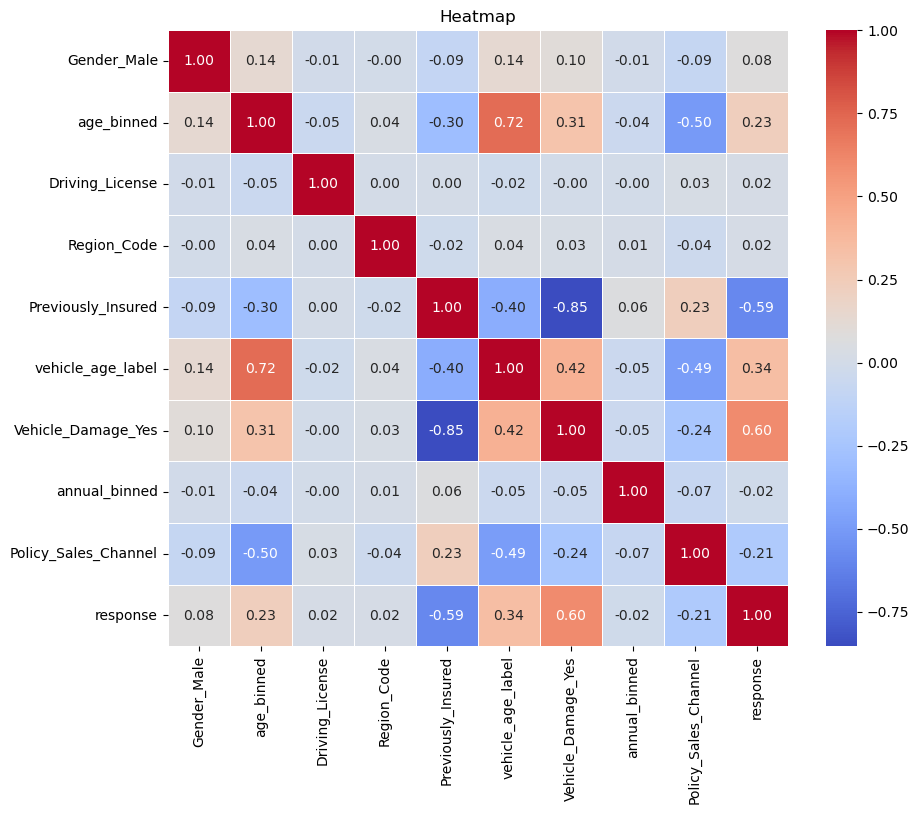

In [37]:
final_features=['Gender_Male','age_binned','Driving_License','Region_Code','Previously_Insured','vehicle_age_label','Vehicle_Damage_Yes','annual_binned','Policy_Sales_Channel','response']
correlation_matrix=df4[final_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Heatmap')
plt.show()

#apparentlt the policy_sales_channel has a better correlation, so I will keep it as it is and I will remove vintage considering its very low correlation

In [38]:
first_features=['Gender_Male','age_binned','Driving_License','Region_Code','Previously_Insured','vehicle_age_label','Vehicle_Damage_Yes','annual_binned','Policy_Sales_Channel','response']
df4=df4[first_features]

## Machine Learning

In [39]:
## Split train and test data
x=df4.drop(['response'],axis=1)
y=df4['response']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [85]:
## Scaled the Data
x=df4.drop(['response'],axis=1)
y=df4['response']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtrain_scaled2=scaler.transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [82]:
## Model training
model=[LogisticRegression(max_iter=1000),
      KNeighborsClassifier(),
      DecisionTreeClassifier(),
      RandomForestClassifier(),
      AdaBoostClassifier(algorithm='SAMME'),
      XGBClassifier()]

In [83]:
test_dict=[]
for m in model:
    m.fit(xtrain_scaled,ytrain)
    ypred=m.predict(xtest_scaled)
    model_name=str(type(m)).split('.')[-1][:-2]
    accuracy=accuracy_score(ytest,ypred)
    precision=precision_score(ytest,ypred)
    recall=recall_score(ytest,ypred)
    ROC_AUC=roc_auc_score(ytest, m.predict_proba(xtest_scaled)[:,1])
    test_dict.append({
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'ROC-AUC':ROC_AUC
    })

df_test=pd.DataFrame(test_dict)
df_test

# the model is good enough (not underfitting)

,model,accuracy,precision,recall,ROC-AUC
0,LogisticRegression,0.786727,0.708063,0.977095,0.829429
1,KNeighborsClassifier,0.786643,0.746640,0.868921,0.835071
2,DecisionTreeClassifier,0.813706,0.751751,0.937774,0.868854
3,RandomForestClassifier,0.814558,0.751432,0.941107,0.870526
4,AdaBoostClassifier,0.788098,0.710663,0.973195,0.843047
5,XGBClassifier,0.805253,0.741171,0.939206,0.860601


In [88]:
# cek whether the model is overfitting or not
train_dict=[]
for m in model:
    m.fit(xtrain_scaled,ytrain)
    ypred=m.predict(xtrain_scaled2)
    model_name=str(type(m)).split('.')[-1][:-2]
    accuracy=accuracy_score(ytrain,ypred)
    precision=precision_score(ytrain,ypred)
    recall=recall_score(ytrain,ypred)
    ROC_AUC=roc_auc_score(ytrain, m.predict_proba(xtrain_scaled2)[:,1])
    train_dict.append({
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'ROC-AUC':ROC_AUC
    })

df_train=pd.DataFrame(train_dict)
df_train

# the evaluation when using train and test data is similar, it means that the model is not overfitting

,model,accuracy,precision,recall,ROC-AUC
0,LogisticRegression,0.783665,0.704398,0.976981,0.827578
1,KNeighborsClassifier,0.791051,0.749804,0.873118,0.842752
2,DecisionTreeClassifier,0.819851,0.756221,0.943603,0.880368
3,RandomForestClassifier,0.819847,0.755218,0.946044,0.880203
4,AdaBoostClassifier,0.785363,0.707228,0.973313,0.840886
5,XGBClassifier,0.804938,0.739492,0.941098,0.861325


## Machine Learning Summary

- Random forest has the best ROC-AUC
- The recall and precision also good for this insurance case, considering the most important thing is still to grasp all of the potential customer (high recall) but still reduce the number of customer that need to be approach (high precision) 